# 보스턴 집값 예측(선형회귀)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy
import pandas as pd
import tensorflow as tf

seed = 0 
numpy.random.seed(seed)  # seed 값 설정
tf.set_random_seed(seed)

df = pd.read_csv("./data/housing.csv", delim_whitespace=True, header=None)
dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [7]:
dataset

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [2]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',   optimizer='adam')
model.fit(X_train, Y_train, epochs=200, batch_size=10)

#flatten() -  데이터 배열이 몇 차원이든 모두 1차원으로 바꿔 읽기 쉽게 해 주는 함수
Y_prediction = model.predict(X_test).flatten()   # 예측 값과 실제 값의 비교
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/200
354/354 [==============================] - 0s 256us/step - loss: 2335.0790
Epoch 2/200
354/354 [==============================] - 0s 70us/step - loss: 116.7748
Epoch 3/200
354/354 [==============================] - 0s 68us/step - loss: 78.0463
Epoch 4/200
354/354 [==============================] - 0s 68us/step - loss: 71.8866
Epoch 5/200
354/354 [==============================] - 0s 68us/step - loss: 70.2894
Epoch 6/200
354/354 [==============================] - 0s 68us/step - loss: 68.2505
Epoch 7/200
354/354 [==============================] - 0s 65us/step - loss: 64.0849
Epoch 8/200
354/354 [==============================] - 0s 68us/step - loss: 63.0074
Epoch 9/200
354/354 [==============================] - 0s 65us/step - loss: 61.2578
Epoch 10/200
354/354 [==============================] - 0s 71us/step - loss: 60.3958
Epoch 11/200
354/354 [==============================] - 0s 65us/step - lo

354/354 [==============================] - 0s 70us/step - loss: 13.5492
Epoch 186/200
354/354 [==============================] - 0s 68us/step - loss: 13.6534
Epoch 187/200
354/354 [==============================] - 0s 68us/step - loss: 14.7378
Epoch 188/200
354/354 [==============================] - 0s 71us/step - loss: 13.6185
Epoch 189/200
354/354 [==============================] - 0s 68us/step - loss: 12.9018
Epoch 190/200
354/354 [==============================] - 0s 70us/step - loss: 15.6737
Epoch 191/200
354/354 [==============================] - 0s 66us/step - loss: 14.6837
Epoch 192/200
354/354 [==============================] - 0s 65us/step - loss: 13.6875
Epoch 193/200
354/354 [==============================] - 0s 62us/step - loss: 19.8171
Epoch 194/200
354/354 [==============================] - 0s 62us/step - loss: 14.4131
Epoch 195/200
354/354 [==============================] - 0s 62us/step - loss: 13.2870
Epoch 196/200
354/354 [==============================] - 0s 70us/ste

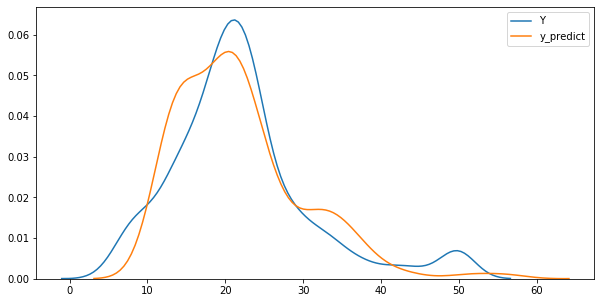

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


#실제 테스트 결과 값(Y)과 예측 결과값(y_predict)
#결과값이 떨어지는 것으로 보아 연비에 영향을 미치는 다른 변수가 있다.
plt.figure(figsize=(10,5))
ax1 = sns.distplot(Y_test, hist = False, label = 'Y')
ax2 = sns.distplot(Y_prediction, hist = False , label = 'y_predict', ax=ax1)
plt.show()
plt.close()